# Backtesting com Pyfolio

## 1 - Importando as ferramentas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import pyfolio as pf 
import warnings

pd.options.display.float_format = '{:.6f}'.format
warnings.filterwarnings('ignore')

## 2 - Coletando os dados

In [2]:
tickers = ['^BVSP', 'ABEV3.SA', 'ITSA4.SA', 'WEGE3.SA', 'USIM5.SA', 'VALE3.SA']
amount_invest = 10000

In [3]:
data = yf.download(tickers= tickers, start='2015-01-01', end='2020-01-01')

[*********************100%***********************]  6 of 6 completed


In [4]:
data_close = data['Close']

## 3 - Visualizando os dados

## 4 - Tratando os dados

In [5]:
daily_return = data_close.pct_change()
daily_return.dropna(inplace=True)

In [6]:
daily_return_cum = (1 + daily_return).cumprod()

In [7]:
wallet = (amount_invest/len(tickers)-1) * daily_return_cum.iloc[:,:5]
wallet['Balance'] = wallet.sum(axis=1)
wallet['Return'] = wallet['Balance'].pct_change()

wallet['Return'][0] = 0.0

aligned_returns = wallet['Return'].reindex(daily_return['^BVSP'].index).dropna()
aligned_benchmark = daily_return['^BVSP'].reindex(wallet['Return'].index).dropna()
aligned_returns = aligned_returns.dropna()
aligned_benchmark = aligned_benchmark.dropna()

## 5 - Analisando os dados

Start date,2015-01-05
End date,2019-12-30
Total months,59
,Backtest
Annual return,20.938%
Cumulative returns,155.217%
Annual volatility,24.228%
Sharpe ratio,0.91
Calmar ratio,0.47
Stability,0.83
Max drawdown,-44.368%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,44.37,2015-05-05,2016-01-18,2017-01-23,450
1,21.67,2018-02-26,2018-06-21,2019-07-04,354
2,14.01,2017-02-21,2017-04-13,2017-08-02,117
3,13.62,2019-07-10,2019-08-26,2019-11-07,87
4,10.25,2017-10-13,2017-11-14,2017-12-21,50


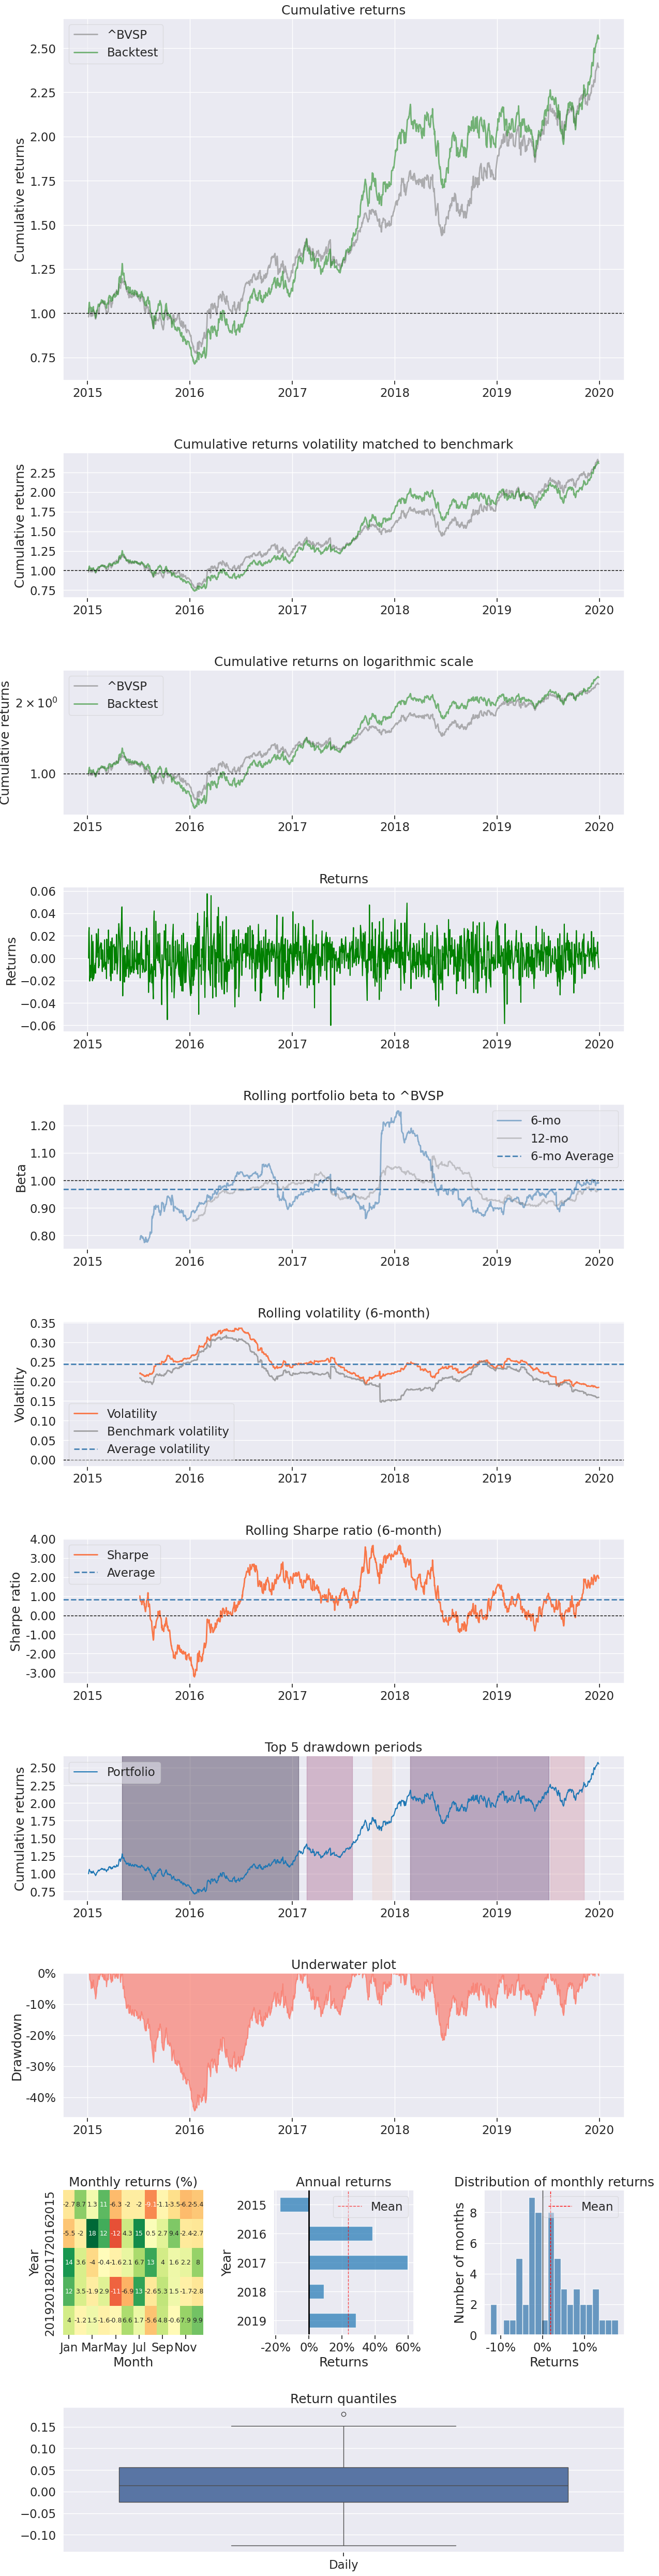

In [8]:
pf.tears.create_returns_tear_sheet(returns=aligned_returns, benchmark_rets=aligned_benchmark)

(0.8, 1.4)

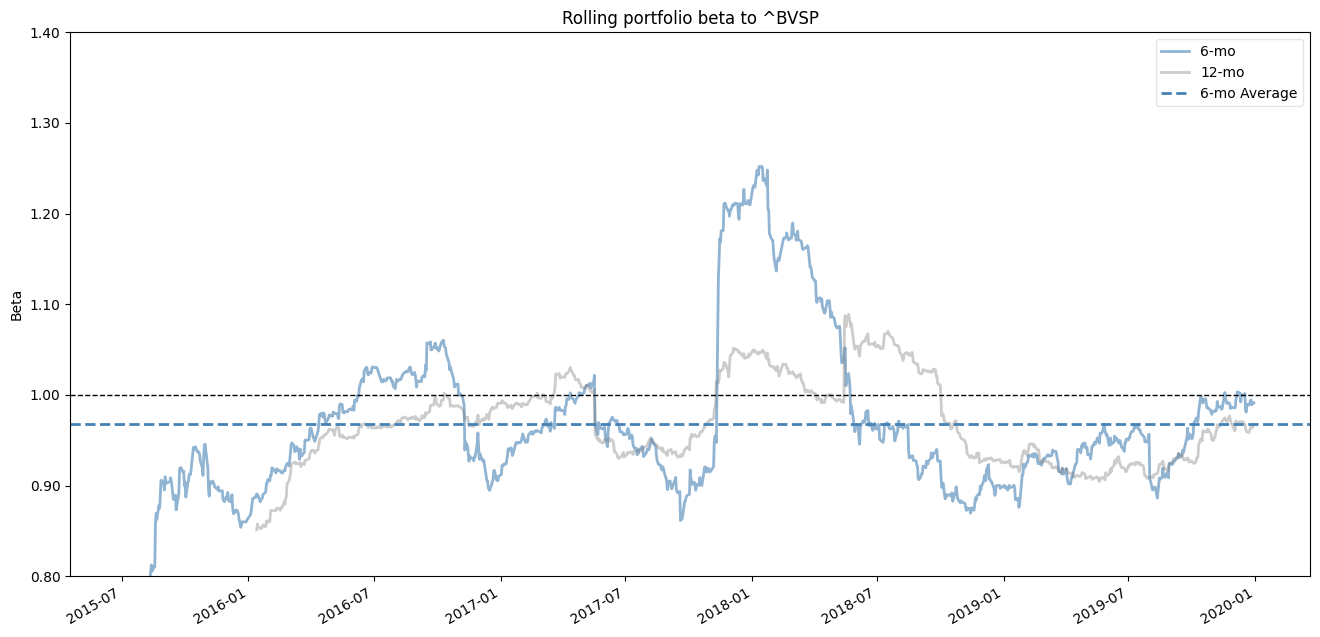

In [9]:
fig, ax = plt.subplots(figsize=(16,8))
pf.plot_rolling_beta(wallet['Return'], factor_returns=aligned_benchmark, ax=ax)
plt.ylim(0.8,1.4)